In [26]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('GS_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,126.70,129.44,124.23,128.87,6188700,GS
1,2006-01-04,127.35,128.91,126.38,127.09,4862000,GS
2,2006-01-05,126.00,127.32,125.61,127.04,3717600,GS
3,2006-01-06,127.29,129.25,127.29,128.84,4319600,GS
4,2006-01-09,128.50,130.62,128.00,130.39,4723500,GS


In [27]:
df1 = df.sort_values(by=['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.drop(['Open', 'High', 'Low', 'Volume','Name'], axis=1)
df1.tail()

,Date,Close
3015,2017-12-22,258.97
3016,2017-12-26,257.72
3017,2017-12-27,255.95
3018,2017-12-28,256.50
3019,2017-12-29,254.76


In [28]:
df1['Value']=df1['Close']
df1 = df1.drop(['Close'], axis=1)
df1.head()

,Date,Value
0,2006-01-03,128.87
1,2006-01-04,127.09
2,2006-01-05,127.04
3,2006-01-06,128.84
4,2006-01-09,130.39


In [29]:
df1['Year'] = df1['Date'].dt.year
df1['Quarter'] = df1['Date'].dt.quarter
df1['Month'] = df1['Date'].dt.month
df1['Week'] = df1['Date'].dt.week
df1['Yearday'] = df1['Date'].dt.dayofyear
df1 = df1.set_index('Date')
df1.head()

,Value,Year,Quarter,Month,Week,Yearday
Date,,,,,,
2006-01-03,128.87,2006,1,1,1,3
2006-01-04,127.09,2006,1,1,1,4
2006-01-05,127.04,2006,1,1,1,5
2006-01-06,128.84,2006,1,1,1,6
2006-01-09,130.39,2006,1,1,2,9


In [30]:
print(len(df1))
df1['Value_zscore'] = (df1['Value'] - df1['Value'].mean())/df1['Value'].std(ddof=0)
df1 = df1[abs(df1['Value_zscore']) < 3]
print(len(df1))

3020
3020


In [31]:
#df1['Value'] = df1.Value.diff(3)
df1 = df1.dropna()

In [23]:
dum1 = pd.get_dummies(df1['Quarter'])
dum2 = pd.get_dummies(df1['Month'])
dum3 = pd.get_dummies(df1['Week'])
dum4 = pd.get_dummies(df1['Yearday'])
#dum3 = pd.get_dummies(df1['Year'])
df1 = pd.concat([df1, dum1, dum2, dum3, dum4], axis=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df1 = df1.drop(['Value_zscore'], axis=1)
sc2 = StandardScaler()
df1[['Yearday','Year','Week','Value','Month','Quarter']] = sc2.fit_transform(df1[['Yearday','Year','Week','Value','Month','Quarter']])
df1.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Value,Year,Quarter,Month,Week,Yearday
Date,,,,,,
2006-01-03,-0.933387,-1.593727,-1.359175,-1.620174,-1.716580,-1.729563
2006-01-04,-0.978606,-1.593727,-1.359175,-1.620174,-1.716580,-1.720000
2006-01-05,-0.979876,-1.593727,-1.359175,-1.620174,-1.716580,-1.710438
2006-01-06,-0.934149,-1.593727,-1.359175,-1.620174,-1.716580,-1.700876
2006-01-09,-0.894772,-1.593727,-1.359175,-1.620174,-1.649661,-1.672188


In [33]:
n = 1
for x in range(n):
    df1['Value-'+str(x+1)] = df1.Value.shift((x+1))

df1['Value'] = df1.Value.shift(-1)
#df1['Value'] = df1.Value.diff()

df1 = df1.dropna()
df1.head()

,Value,Year,Quarter,Month,Week,Yearday,Value-1
Date,,,,,,,
2006-01-04,-0.979876,-1.593727,-1.359175,-1.620174,-1.716580,-1.720000,-0.933387
2006-01-05,-0.934149,-1.593727,-1.359175,-1.620174,-1.716580,-1.710438,-0.978606
2006-01-06,-0.894772,-1.593727,-1.359175,-1.620174,-1.716580,-1.700876,-0.979876
2006-01-09,-0.853109,-1.593727,-1.359175,-1.620174,-1.649661,-1.672188,-0.934149
2006-01-10,-0.854634,-1.593727,-1.359175,-1.620174,-1.649661,-1.662626,-0.894772


In [34]:
df3 = df1.copy(deep=False)

In [35]:
#df3 = df3.drop(['Week','Yearday','Month','Quarter'], axis=1)

In [36]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8 - 1)):]
trains = np.split(train, [1], axis=1)
train_y=trains[0]
train_x=trains[1]
tests = np.split(test, [1], axis=1)
test_y=tests[0]
test_x=tests[1]

In [37]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [38]:
train_x.head()

,Year,Quarter,Month,Week,Yearday,Value-1
Date,,,,,,
2006-01-04,-1.593727,-1.359175,-1.620174,-1.716580,-1.720000,-0.933387
2006-01-05,-1.593727,-1.359175,-1.620174,-1.716580,-1.710438,-0.978606
2006-01-06,-1.593727,-1.359175,-1.620174,-1.716580,-1.700876,-0.979876
2006-01-09,-1.593727,-1.359175,-1.620174,-1.649661,-1.672188,-0.934149
2006-01-10,-1.593727,-1.359175,-1.620174,-1.649661,-1.662626,-0.894772


### Trend Seasonal Analysis

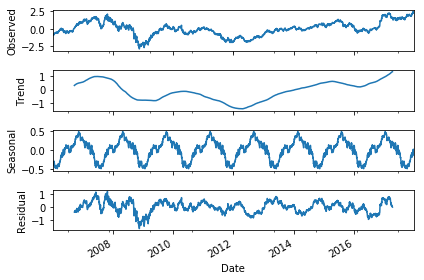

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df3.Value, model='additive', freq=365)
result.plot()
plt.show()

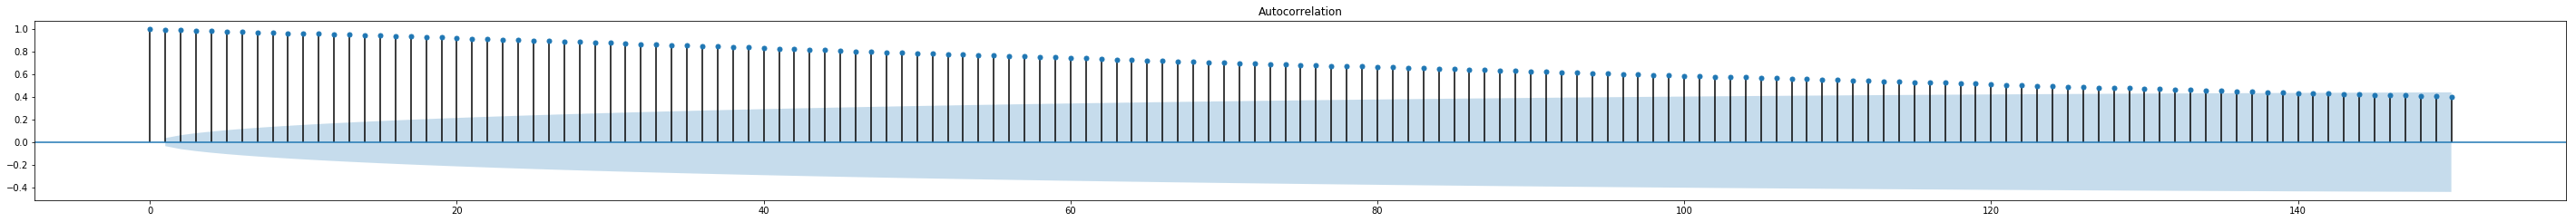

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(50,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df3.Value, lags=150, ax=ax1)

### Naive Test: Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
reg.score(train_x.values, train_y.values)

reg.coef_

array([[-3.86338780e-05, -3.03739360e-03,  3.59733974e-03,
        -1.04282469e-02,  9.90346282e-03,  9.92210716e-01]])

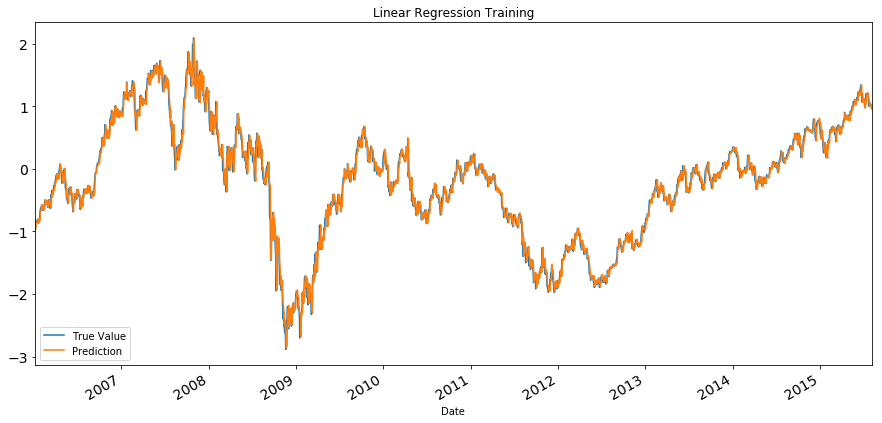

adj train r^2 = 0.9834088459556835
train mse = 0.013745373844581911


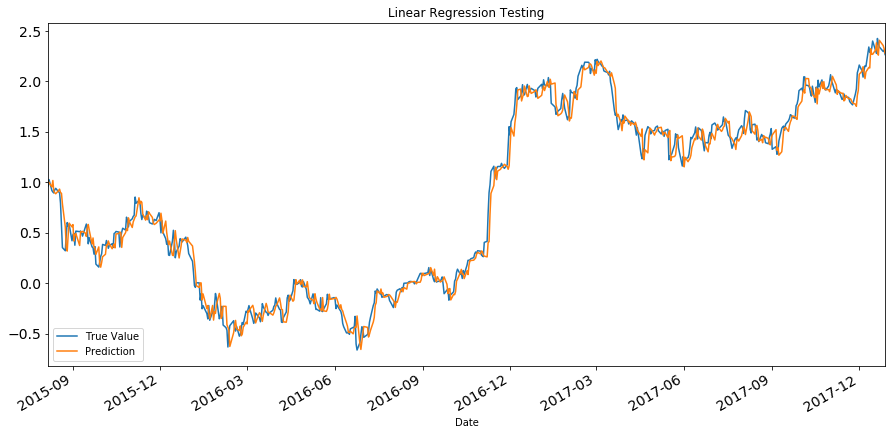

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.9859600450614471
test mse = 0.011052885582754602


In [42]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Naive Test: SARIMAX

In [43]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
auto_arima(df3['Value'],seasonal=True,m=4).summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecat

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3018
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 4)   Log Likelihood                3214.222
Date:                           Sun, 19 May 2019   AIC                          -6420.445
Time:                                   00:41:49   BIC                          -6396.397
Sample:                                        0   HQIC                         -6411.797
                                          - 3018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.001      0.754      0.451      -0.002       0.004
ma.L1         -0.0533      0.012     -4.367      0.000      -0.077      -0.029
ma.S.L4       -0.0315      0.012     -2.527      0.012      -0.056      -0.007
sigma2         0.0070   9.28e-05     74.911      0.000       0.007       0.007
===================================================================================
Ljung-Box (Q):                       63.14   Jarque-Bera (JB):              4254.78
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
train.columns

Index(['Value', 'Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1'], dtype='object')

In [45]:
exog = train[['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']].values
model = SARIMAX(train['Value'],exog=exog,order=(0,1,1),seasonal_order=(0,0,1,4),enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Value   No. Observations:                 2414
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 4)   Log Likelihood                2501.618
Date:                           Sun, 19 May 2019   AIC                          -4985.236
Time:                                   00:41:59   BIC                          -4933.161
Sample:                                        0   HQIC                         -4966.294
                                          - 2414                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1083      1.174      0.944      0.345      -1.193       3.410
x2             0.0282      0.027      1.031      0.303      -0.025       0.082
x3            -0.0096      0.038     -0.251      0.802      -0.085       0.065
x4            -0.0061      0.008     -0.763      0.445      -0.022       0.010
x5             0.0865      0.100      0.867      0.386      -0.109       0.282
x6            -0.0125      0.012     -1.021      0.307      -0.036       0.011
ma.L1         -0.0646      0.014     -4.764      0.000      -0.091      -0.038
ma.S.L4       -0.0305      0.014     -2.206      0.027      -0.058      -0.003
sigma2         0.0073      0.000     67.142      0.000       0.007       0.008
===================================================================================
Ljung-Box (Q):                       84.06   Jarque-Bera (JB):              3857.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


adj test r^2 = -0.03230146785217558
test mse = 0.812674261492734


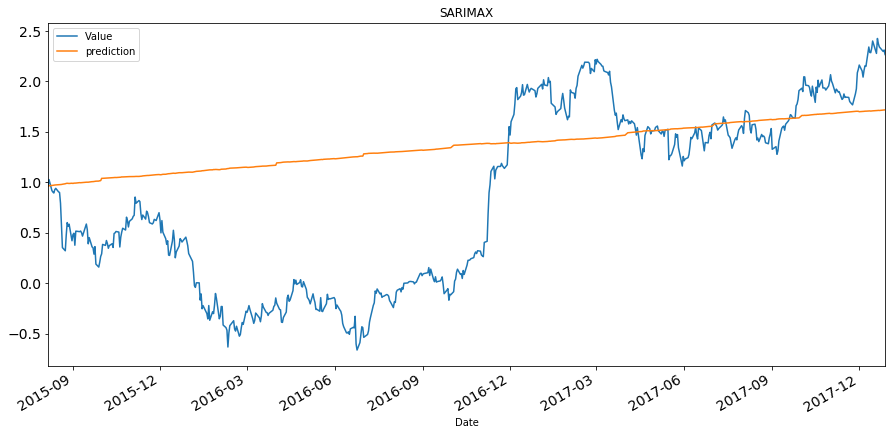

In [46]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX Predictions')

test_y2 = test_y.copy(deep=False)
test_y2['prediction']=predictions.values
test_y2.plot(figsize=(15,7), title= 'SARIMAX', fontsize=14)
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.Value, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.Value, test_y2.prediction)))

### Model 1: ExtraTrees

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

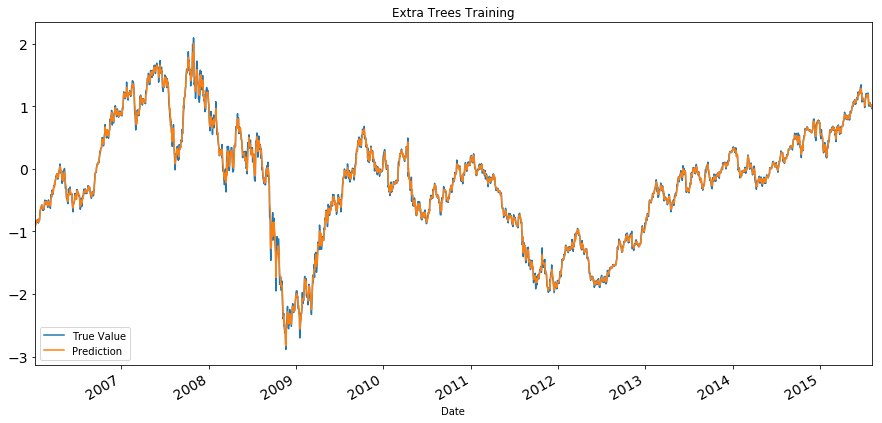

adj train r^2 = 0.9982743594102574
train mse = 0.001429651907518855


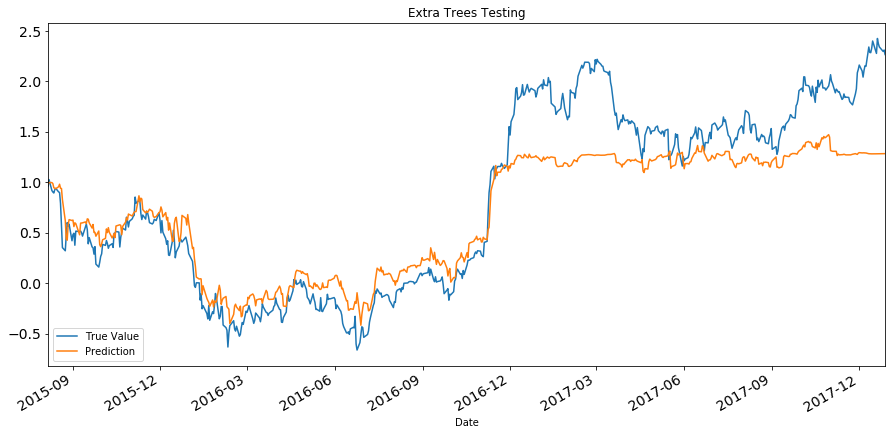

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.8033430579235277
test mse = 0.15481721197387874


In [48]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 2: Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

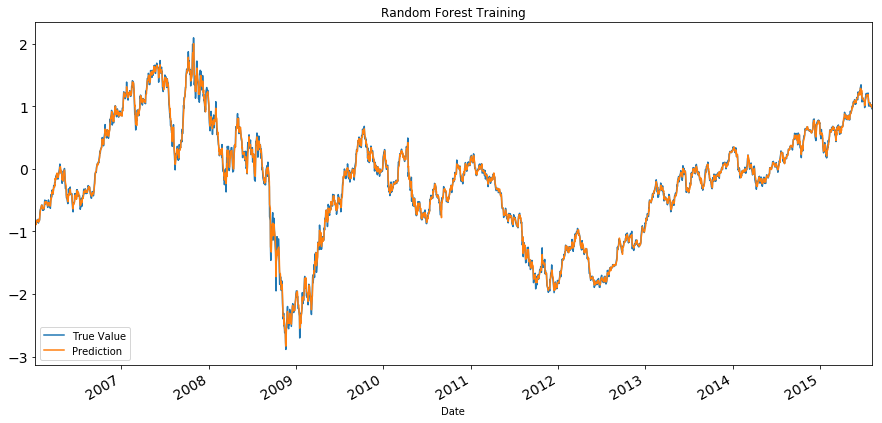

adj train r^2 = 0.9979205751743709
train mse = 0.0017227536754603676


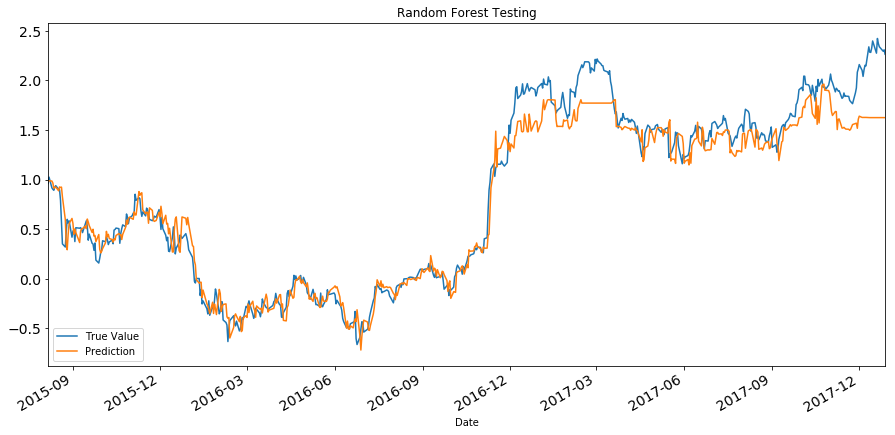

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.9461604929776866
test mse = 0.042384887526631825


In [50]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 3: XGBoost

In [51]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

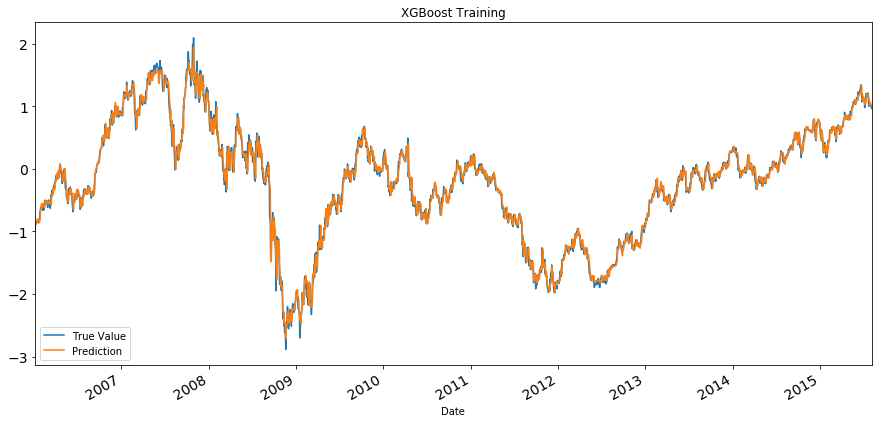

adj train r^2 = 0.987397254306786
train mse = 0.010441073029561881


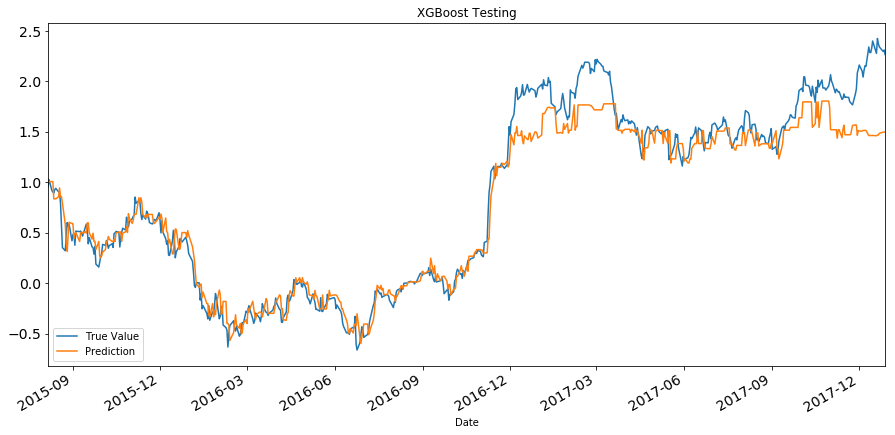

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.9340840294054464
test mse = 0.051892024172900314


In [52]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 4: Feed Forward Neural Network

In [53]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [54]:
#K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=6, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.003))
#model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(2, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.values.ravel(), validation_data=[test_x.values, test_y['Value'].values.ravel()], epochs=50,verbose=1,shuffle=False)

Train on 2414 samples, validate on 605 samples
Epoch 1/50
2414/2414 [==============================] - 0s 194us/step - loss: 2.8437 - val_loss: 2.7189
Epoch 2/50
2414/2414 [==============================] - 0s 56us/step - loss: 1.7814 - val_loss: 1.5914
Epoch 3/50
2414/2414 [==============================] - 0s 56us/step - loss: 1.2001 - val_loss: 1.0231
Epoch 4/50
2414/2414 [==============================] - 0s 56us/step - loss: 0.8134 - val_loss: 0.6798
Epoch 5/50
2414/2414 [==============================] - 0s 56us/step - loss: 0.5516 - val_loss: 0.4593
Epoch 6/50
2414/2414 [==============================] - 0s 54us/step - loss: 0.3786 - val_loss: 0.3162
Epoch 7/50
2414/2414 [==============================] - 0s 56us/step - loss: 0.2672 - val_loss: 0.2243
Epoch 8/50
2414/2414 [==============================] - 0s 57us/step - loss: 0.1969 - val_loss: 0.1662
Epoch 9/50
2414/2414 [==============================] - 0s 56us/step - loss: 0.1533 - val_loss: 0.1299
Epoch 10/50
2414/2414 [==

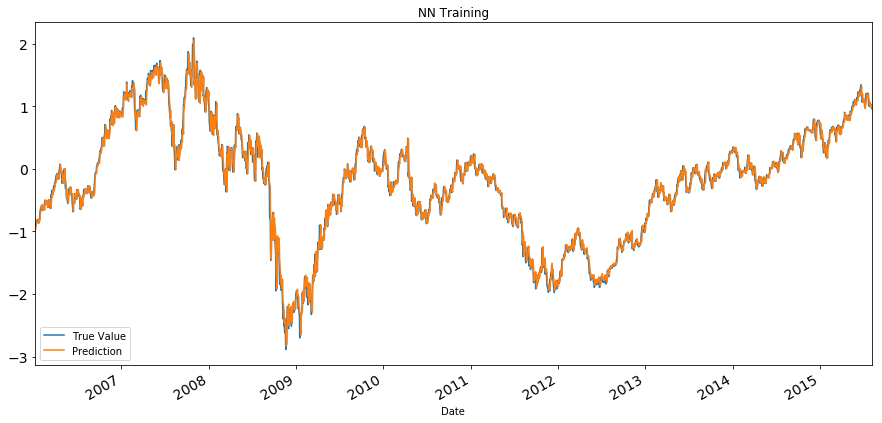

adj train r^2 = 0.9833559466330593
train mse = 0.013789199666682777


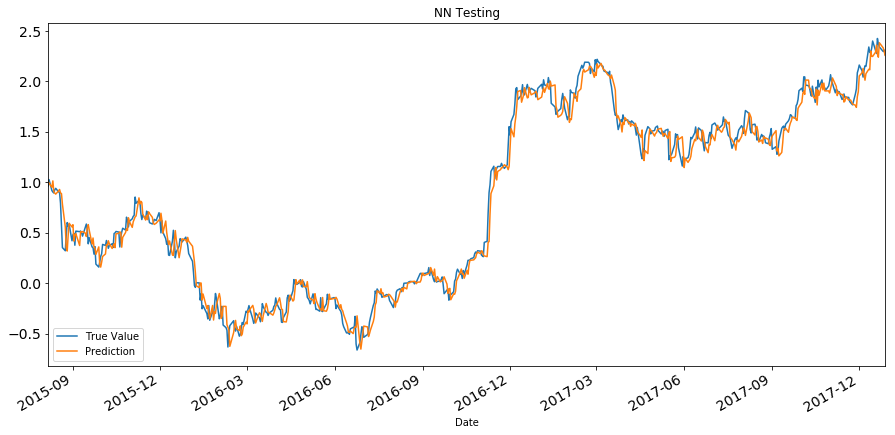

adj test r^2 = 0.985710103574344
test mse = 0.011249650791149177


In [55]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model.predict(train_x.values)
test_y['prediction'] = model.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 5: LSTM

In [56]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [57]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(60, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.l2(0.03), return_sequences=True))
model_lstm.add(Dropout(0.002))
model_lstm.add(LSTM(60, input_shape=(1, train_x.values.shape[1]), activation='linear',return_sequences=True))
model_lstm.add(LSTM(60, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.002))
model_lstm.add(LSTM(60, input_shape=(1, train_x.values.shape[1]), activation='linear'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.values.ravel(), validation_data=[X_tst_t, test_y['Value'].values.ravel()], epochs=50, verbose=1, shuffle=False)

Train on 2414 samples, validate on 605 samples
Epoch 1/50
2414/2414 [==============================] - 6s 3ms/step - loss: 7.1273 - val_loss: 6.5926
Epoch 2/50
2414/2414 [==============================] - 1s 468us/step - loss: 4.8601 - val_loss: 4.2066
Epoch 3/50
2414/2414 [==============================] - 1s 456us/step - loss: 3.4459 - val_loss: 2.9084
Epoch 4/50
2414/2414 [==============================] - 1s 460us/step - loss: 2.5140 - val_loss: 2.1350
Epoch 5/50
2414/2414 [==============================] - 1s 459us/step - loss: 1.8414 - val_loss: 1.5534
Epoch 6/50
2414/2414 [==============================] - 1s 460us/step - loss: 1.3378 - val_loss: 1.1176
Epoch 7/50
2414/2414 [==============================] - 1s 466us/step - loss: 0.9603 - val_loss: 0.8006
Epoch 8/50
2414/2414 [==============================] - 1s 457us/step - loss: 0.6840 - val_loss: 0.5692
Epoch 9/50
2414/2414 [==============================] - 1s 462us/step - loss: 0.4884 - val_loss: 0.4043
Epoch 10/50
2414/24

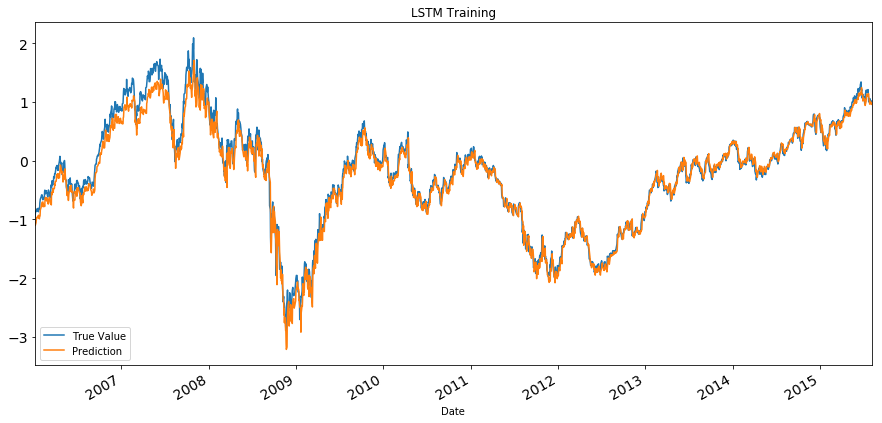

adj train r^2 = 0.9688655505816749
train mse = 0.025794145817523907


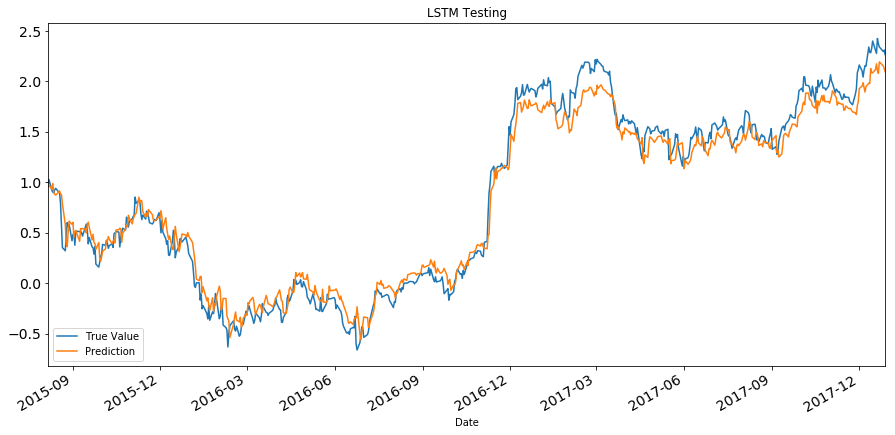

adj test r^2 = 0.9733255233116422
test mse = 0.02099935078898917


In [58]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model_lstm.predict(X_tr_t)
test_y['prediction'] = model_lstm.predict(X_tst_t)
train_y2['Value'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model_lstm.predict(X_tr_t))))
test_y['Value'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 6: TPOT

In [59]:
def my_custom_accuracy(y_true, y_pred):
    
    return (adj_r2_score((r2_score(y_true, y_pred)),train_x.shape[0], train_x.shape[1]))

In [60]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=5, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.values.ravel())

Generation 1 - Current best internal CV score: -0.014263319616734443
Generation 2 - Current best internal CV score: -0.014257064791458149
Generation 3 - Current best internal CV score: -0.014131735454056693
Generation 4 - Current best internal CV score: -0.014099573629542131
Generation 5 - Current best internal CV score: -0.014099573629542131
Generation 6 - Current best internal CV score: -0.014099573629542034
Generation 7 - Current best internal CV score: -0.014099573629542034
Generation 8 - Current best internal CV score: -0.014051833843341502
Generation 9 - Current best internal CV score: -0.014051833843341058
Generation 10 - Current best internal CV score: -0.014051833843341058
Generation 11 - Current best internal CV score: -0.014051833843341058
Generation 12 - Current best internal CV score: -0.014051833843341058
Generation 13 - Current best internal CV score: -0.014051833843340897
Generation 14 - Current best internal CV score: -0.014051833843340897
Generation 15 - Current best 

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validat

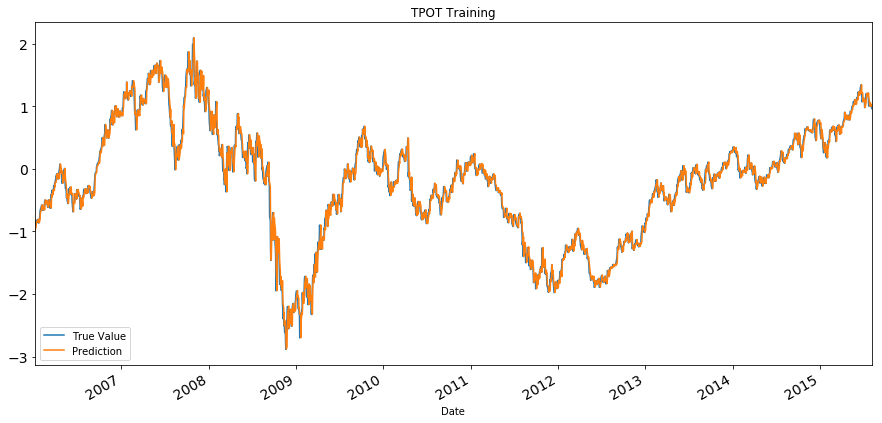

adj train r^2 = 0.9833571411630251
train mse = 0.013788210027209482


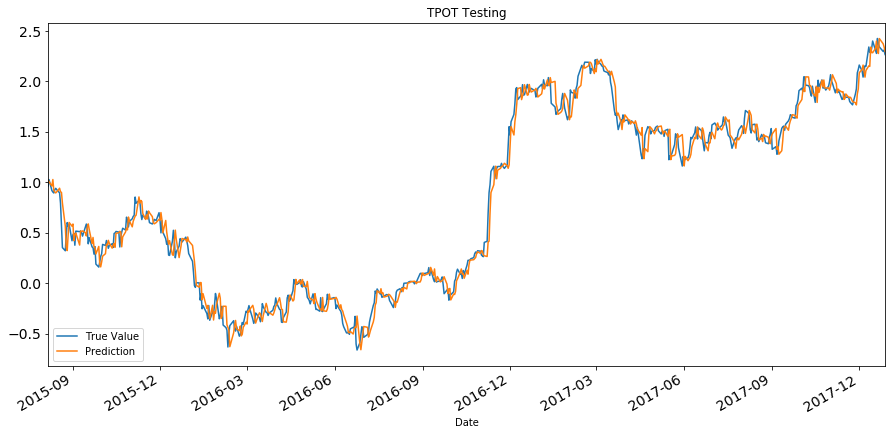

adj test r^2 = 0.9861263110845566
test mse = 0.010921993472504153


In [61]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, train_y2.prediction)))
test_y['Value'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))